In [1]:
import numpy as np
import lbg_forecast.igm as igm
import matplotlib.pyplot as plt
import numpy as np

(17,) (17,)


Text(0, 0.5, 'Transmission')

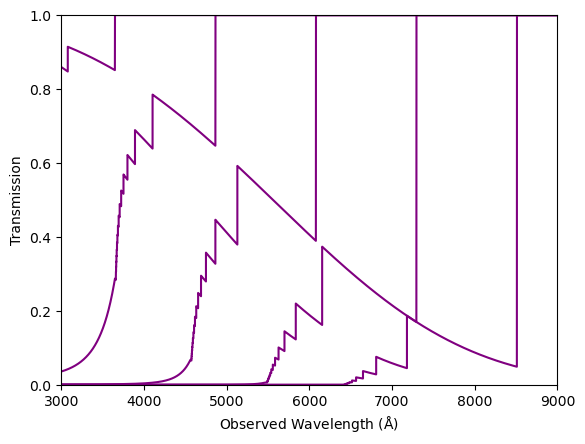

In [ ]:
"""https://github.com/PAU-survey/bcnz/blob/3c4122e05ce338c29de3941c751d4c2e440b22be/bcnz/model/etau_madau.py#L7"""

def etau_madau(wl, z):
    """
    Madau 1995 extinction for a galaxy spectrum at
    (redshift, wavelenght) defined on a grid (z, wl)
    Args:
        wl (np.array): wavelength values of the grid in Angstroms
        z (np.array): redshift values of the grid
    """
    xe = 1.0 + z
    Lyman_limit = 912.0
    a_metal = 0.0017

    # Madau coefficients
    #l = np.array([1216.0, 1026.0, 973.0, 950.0])
    l = np.array([
        1215.67,
        1025.72,
        972.537,
        949.743,
        937.803,
        930.748,
        926.226,
        923.15,
        920.963,
        919.352,
        918.129,
        917.181,
        916.429,
        915.824,
        915.329,
        914.919,
        914.576,
        #Lyman_limit,
    ])


    #c = np.array([3.6e-3, 1.7e-3, 1.2e-3, 9.3e-4])
    c = np.array([
        0.0036,
        0.0017,
        0.0011846,
        0.0009410,
        0.0007960,
        0.0006967,
        0.0006236,
        0.0005665,
        0.0005200,
        0.0004817,
        0.0004487,
        0.0004200,
        0.0003947,
        0.000372,
        0.000352,
        0.0003334,
        0.00031644,
    ])
    print(c.shape, l.shape)
    ll = 912.0

    # Lyman series absorption
    Lyman = np.outer(wl ** 3.46, c / l ** 3.46)
    sel1 = np.divide.outer(wl, np.outer(l, xe)) < 1.0
    tau1 = np.sum(np.einsum("ijk,ij->ijk", sel1, Lyman), axis=1).T

    # Photoelectric absorption
    xc = wl / ll
    xc3 = xc ** 3
    photoel = (
        0.25 * np.einsum("j,ij->ij", xc3, np.subtract.outer(xe ** 0.46, xc ** 0.46))
        + 9.4
        * np.einsum("j,ij->ij", xc ** 1.5, np.subtract.outer(xe ** 0.18, xc ** 0.18))
        - 0.7
        * np.einsum("i,ij->ij", xc3, np.subtract.outer(xc ** (-1.32), xe ** (-1.32))).T
        - 0.023 * np.subtract.outer(xe ** 1.68, xc ** 1.68)
    )

    sel2 = (np.divide.outer(wl, ll * xe) <= 1.0).T
    tau2 = sel2 * photoel

    # Add all together
    tau = tau1 + tau2
    tau = np.einsum("ij,j->ij", tau, wl >= ll)
    tau = np.clip(tau, 0, 700)
    etau = np.exp(-tau)
    return etau

l_obs = np.linspace(3000, 9000, int(9000-3000)*10)
zs = np.arange(2, 7, 1)

#for z in zs:
    #trans = madau(l_obs, z, lylim=True, metals=False, Xcut=False, Xlim=100)
trans = etau_madau(l_obs, zs)
#plt.plot(l_obs, trans)

plt.plot(l_obs, trans.T, color='purple')


plt.xlim(3000, 9000)
plt.ylim(0, 1.0)
plt.xlabel("Observed Wavelength ($\mathrm{\AA}$)")
plt.ylabel("Transmission")

In [2]:
z2 = np.loadtxt("inoue14/z2.txt")
z3 = np.loadtxt("inoue14/z3.txt")
z4 = np.loadtxt("inoue14/z4.txt")
z5 = np.loadtxt("inoue14/z5.txt")
z6 = np.loadtxt("inoue14/z6.txt")

Text(0, 0.5, 'Transmission')

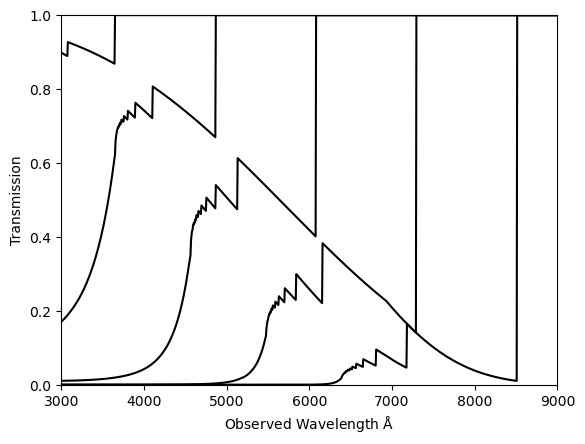

In [3]:
zs = np.arange(2, 7, 1)

l_obs = np.linspace(3000, 9000, int(9000-3000)*10)
df_igm = 0.001

for z in zs:

    tau_eff = igm.lyman_continuum_tau(l_obs, z)
    tau_eff_series = igm.lyman_series_line_tau(l_obs, z)
    #plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)), ls='-', c='purple')
    #plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1+df_igm)), ls='--', c='purple', zorder=1000)
    #plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1-df_igm)), ls='--', c='purple', zorder=1000)

#plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series))*1.5)
#plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series))*0.5)
plt.plot(z2[:, 0], z2[:, 1], c='k')
plt.plot(z3[:, 0], z3[:, 1], c='k')
plt.plot(z4[:, 0], z4[:, 1], c='k')
plt.plot(z5[:, 0], z5[:, 1], c='k')
plt.plot(z6[:, 0], z6[:, 1], c='k')
plt.xlim(3000, 9000)
plt.ylim(0, 1.0)
plt.xlabel("Observed Wavelength $\mathrm{\AA}$")
plt.ylabel("Transmission")


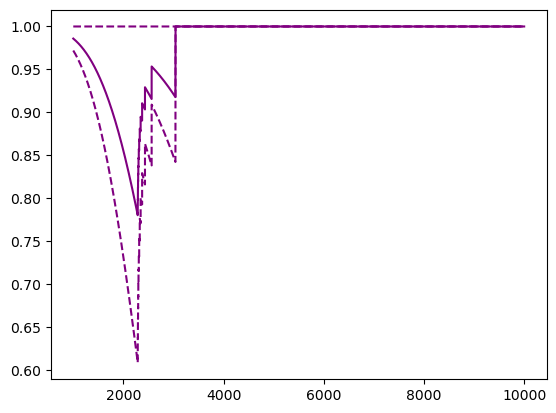

In [4]:
zs = np.array([1.5])#np.arange(2, 7, 1)

l_obs = np.linspace(1000, 10000, int(10000-1000)*20)
df_igm = 1.0

for z in zs:

    tau_eff = igm.lyman_continuum_tau(l_obs, z)
    tau_eff_series = igm.lyman_series_line_tau(l_obs, z)
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)), ls='-', c='purple')
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1+df_igm)), ls='--', c='purple', zorder=1000)
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1-df_igm)), ls='--', c='purple', zorder=1000)

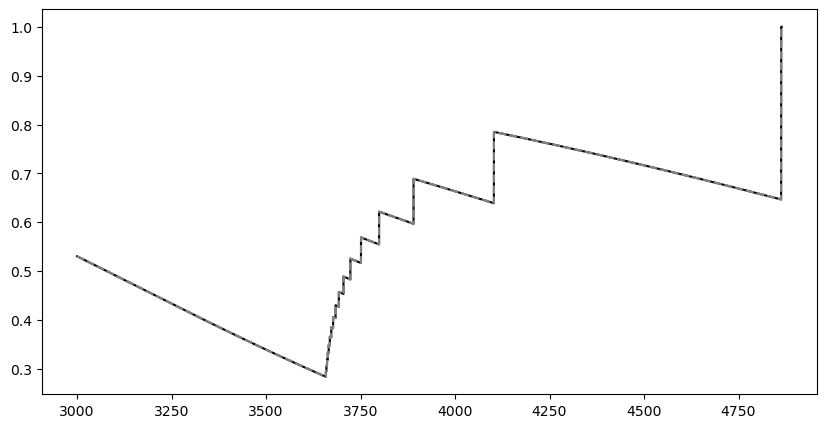

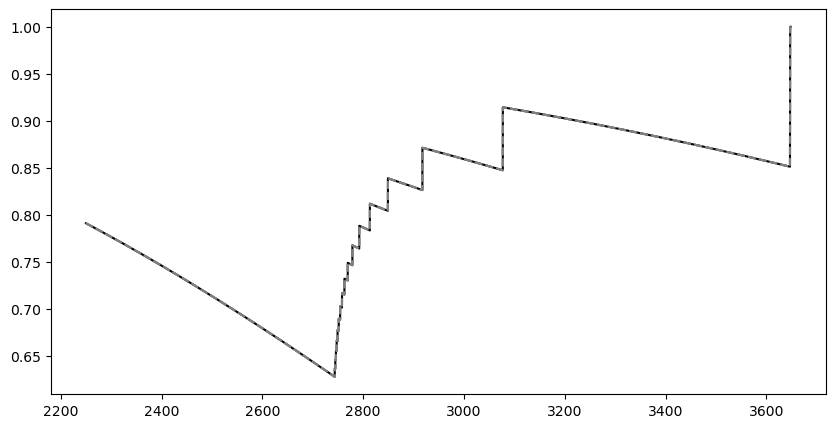

In [9]:
igm.plot_transmission_curves(3.0, 0.0)
igm.plot_transmission_curves(2.0, 0.0)

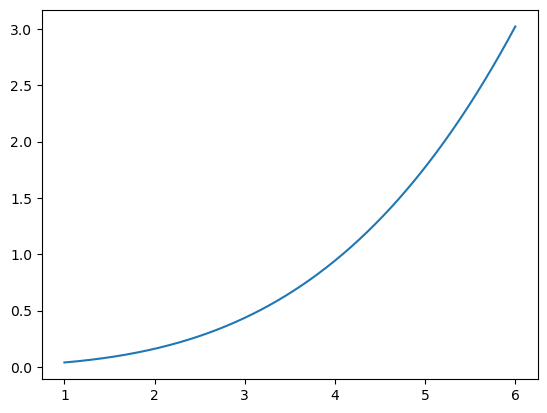

In [6]:
igm.plot_lya_transmission(1, 6, tau=True)